In [1]:
import os
import time
import itertools
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, precision_recall_fscore_support, classification_report


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
start = time.time()

# read a given file for training
# content of the email starts from the 3rd row of the file

def read_mail_paths(path_directory):
    mail_paths = []
    for f in os.listdir(path_directory):
        mail_paths.append(os.path.join(path_directory, f))    
        
    return mail_paths


In [3]:
# constants
# training, test dataset paths, 
# the number of training and test data sets

train_paths = '/Users/brain/Desktop/academic/yeterlik/data/train_emails'
test_paths = '/Users/brain/Desktop/academic/yeterlik/data/test_emails'
no_of_training_set = len(read_mail_paths(train_paths))
no_of_test_set = len(read_mail_paths(test_paths))


In [4]:
# this function returns word_list with their frequency
# I use this function to construct feature matrix for training and test data sets

def prepare_words(path1):
    mail_paths = read_mail_paths(path1)
    print('Successful to read paths of a dataset...')
    
    all_words = []       
    for mails in mail_paths:    
        with open(mails) as mail:
            for i, line in enumerate(mail):
                if i == 2: 
                    words = line.split()
                    all_words += words
    
    candidate_words_dictionary = Counter(all_words)

    # remove words from candidate_words_dictionary whether 
    # the string consists of non-alphabetic characters,
    # invalid words,
    # and if a length of a word equal to one 
    # (such as punctuation, meaningless words, and so on).
    for item in list(candidate_words_dictionary):
        if len(item) == 1: 
            del candidate_words_dictionary[item]
        elif item.isalpha() == False:
            del candidate_words_dictionary[item]
            
    candidate_words_dictionary = candidate_words_dictionary.most_common(len(candidate_words_dictionary))

    return candidate_words_dictionary


In [5]:
# this function returns input for classifiers 
# input is a feature matrix 
# that is constructed by using term frequency method

valid_word_dictionary = prepare_words(train_paths)

def extract_features(path2): 
    # read given files for training and test
    mail_paths = read_mail_paths(path2)

    # create a feature matrix 
    features_matrix = np.zeros((len(mail_paths), len(valid_word_dictionary)))
    mail_id = 0
    
    for mails in mail_paths:
        with open(mails) as mail:
            for i, line in enumerate(mail):
                if i == 2:
                    words = line.split()
                    for word in words:
                        word_id = 0
                        for i, x in enumerate(valid_word_dictionary):
                            if x[0] == word:
                                word_id = i
                                # we can also use Boolean matrix
#                                 features_matrix[mail_id, word_id] = 1
                                
                                # we use term frequency of each word
                                features_matrix[mail_id, word_id] = words.count(word)
        mail_id += 1     
    return features_matrix


Successful to read paths of a dataset...


In [8]:
# Create a dictionary of words with its frequency

def train_classifier_model(train_paths):
    train_matrix = extract_features(train_paths)
   
    print('Successful to extract features for training data...')

    # Prepare feature vectors per training email and its labels
    # 240 --> legitimate: 1
    # 240 --> spam: 0

    train_labels = np.zeros(no_of_training_set)
    train_labels[:int(np.divide(no_of_training_set, 2))] = 1

    model6 = RandomForestClassifier(n_estimators=40, random_state = 42, n_jobs=-1)
    model6.fit(train_matrix, train_labels)

    return model6
    

In [9]:
# test a model using three selected supervised learning algorithm

def test_classifier_model(test_paths):
    test_matrix = extract_features(test_paths)
    print('Successful to extract features for test data...')

    # Prepare feature vectors per test email and its labels
    test_labels = np.zeros(no_of_test_set)
    test_labels[:int(np.divide(no_of_test_set, 2))] = 1

    model6 = train_classifier_model(train_paths)
    print('Successful to train data...')
    
    prediction6 = model6.predict(test_matrix)
    
    return test_labels, prediction6    


In [10]:
# test_labels, prediction1, prediction2, prediction3, prediction4, prediction5, prediction6, prediction7 = test_classifier_model(test_paths)
test_labels, prediction6 = test_classifier_model(test_paths)
print('Successful to test data...')

done = time.time()
elapsed = done - start
print("total time: ", elapsed)

confusion_matrix(test_labels, prediction6)

Successful to extract features for test data...
Successful to extract features for training data...
Successful to train data...
Successful to test data...
total time:  1013.2684652805328


array([[236,   4],
       [  8, 232]])

In [14]:
print("Accuracy Score: ", accuracy_score(test_labels, prediction6))
print("F1 Score: ", f1_score(test_labels, prediction6))
print("Precision Score: ", precision_score(test_labels, prediction6))
print("Recall Score: ", recall_score(test_labels, prediction6))


Accuracy Score:  0.975
F1 Score:  0.9747899159663865
Precision Score:  0.9830508474576272
Recall Score:  0.9666666666666667


Confusion matrix, without normalization


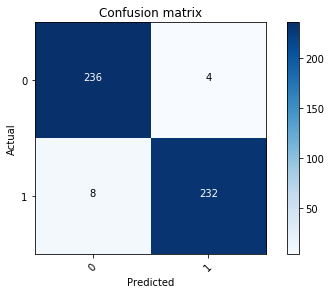

In [17]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
 
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')


    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Actual')
    plt.xlabel('Predicted')

plt.figure()
plot_confusion_matrix(confusion_matrix(test_labels, prediction6), classes=['0', '1'], normalize=False)
plt.show()